### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Import Dataset

In [2]:
# Path
base_path = Path.home()
project_path = base_path / 'Desktop' / 'Career Foundry' / 'Course' / 'Data Immersion' / '6 Advanced Analytics & Dashboard Design' / 'House Sales in King County, USA'

In [3]:
# Importing Dataset
file_path = project_path / '02 Data' / 'Prepared Data' / 'kc_house_data_wrangled2.pkl'
df = pd.read_pickle(file_path)

In [4]:
# Displaying values in the float format 
pd.set_option('display.float_format', '{:.2f}'.format) 

### Data Cleaning

In [5]:
df.columns

Index(['property_id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_land_area', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'year_built', 'year_renovated',
       'zipcode', 'latitude', 'longtitude', 'sqft_avg_neighbor_living',
       'sqft_avg_neighbor_land_area', 'Price category'],
      dtype='object')

In [6]:
# Renaming price category
df.rename(columns = {'Price category' : 'price category'}, inplace = True)

In [7]:
df.dtypes

property_id                             int64
date                           datetime64[ns]
price                                 float64
bedrooms                                int64
bathrooms                             float64
sqft_living                             int64
sqft_land_area                          int64
floors                                float64
waterfront                              int64
view                                    int64
condition                               int64
grade                                   int64
sqft_above                              int64
sqft_basement                           int64
year_built                              int64
year_renovated                        float64
zipcode                                 int64
latitude                              float64
longtitude                            float64
sqft_avg_neighbor_living                int64
sqft_avg_neighbor_land_area             int64
price category                    

In [8]:
# Changing zipcode as category
df['zipcode'] = df['zipcode'].astype('category')

In [9]:
# Check of data
df.head()

,property_id,date,price,bedrooms,bathrooms,sqft_living,sqft_land_area,floors,waterfront,view,...,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longtitude,sqft_avg_neighbor_living,sqft_avg_neighbor_land_area,price category
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,1180,0,1955,NaN,98178,47.51,-122.26,1340,5650,Low price
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,2170,400,1951,1991.00,98125,47.72,-122.32,1690,7639,Middle price
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,770,0,1933,NaN,98028,47.74,-122.23,2720,8062,Low price
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,1050,910,1965,NaN,98136,47.52,-122.39,1360,5000,Middle price
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,1680,0,1987,NaN,98074,47.62,-122.05,1800,7503,Middle price


In [10]:
# Checking the shape
df.shape

(21435, 22)

##### Missing Values

In [11]:
df.isnull().sum()

property_id                        0
date                               0
price                              0
bedrooms                           0
bathrooms                          0
sqft_living                        0
sqft_land_area                     0
floors                             0
waterfront                         0
view                               0
condition                          0
grade                              0
sqft_above                         0
sqft_basement                      0
year_built                         0
year_renovated                 20525
zipcode                            0
latitude                           0
longtitude                         0
sqft_avg_neighbor_living           0
sqft_avg_neighbor_land_area        0
price category                     0
dtype: int64

No missing values - the 20525 missing values for year renovated actually mean, that the house was not renovated at all.

##### Duplicates

In [12]:
dups = df.duplicated()

In [13]:
dups.shape

(21435,)

No duplicates

##### Extreme Values

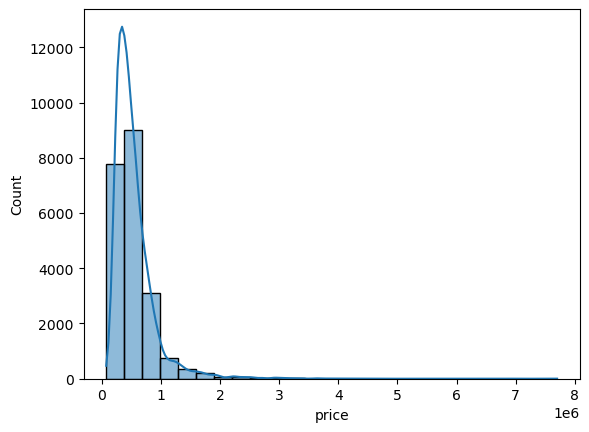

In [14]:
sns.histplot(df['price'], bins=25, kde=True)
plt.show()

In [15]:
# Checking the mean
df['price'].mean() 

np.float64(541645.3744343363)

In [16]:
# Chekcing the median
df['price'].median() 

450000.0

In [17]:
# Checking the max
df['price'].max()

7700000.0

### Data preparation for regression analysis

**Hypothesis 1**

If a house has a larger living area, then its price will be higher.

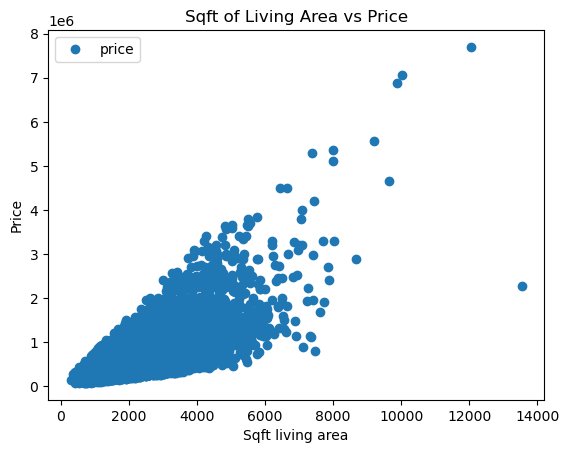

In [18]:
# Create a scatterplot of sqft living area and price

df.plot(x = 'sqft_living', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Sqft of Living Area vs Price')  
plt.xlabel('Sqft living area')  
plt.ylabel('Price')  
plt.show()

In [19]:
# Reshaping the variables putting them into separate objects.
X = df['sqft_living'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [20]:
# Checking X
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [21]:
# Checking y
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [22]:
# Splitting data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [23]:
# Creating a regression object.
regression = LinearRegression()

In [24]:
# Fitting the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predicting the values of y using X
y_predicted = regression.predict(X_test)

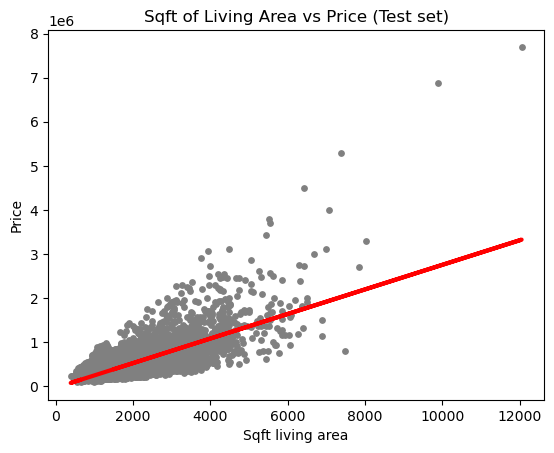

In [26]:
# Creating a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Sqft of Living Area vs Price (Test set)')
plot_test.xlabel('Sqft living area')
plot_test.ylabel('Price')
plot_test.show()

The red regression line does not pass through all the data points, since the points are widely spread. However, it shows an overall positive trend, which suggest that larger living areas are generally associated with higher prices. 

In [27]:
# Creating objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [28]:
# Printing the model summary statistics. 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[279.09973365]]
Mean squared error:  68997868574.9487
R2 score:  0.5009244142187305


In [29]:
# Creating a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,294000.00,386613.35
1,272000.00,528954.21
2,464000.00,601520.14
3,190000.00,417314.32
4,360000.00,314047.42
5,930000.00,766188.99
6,310000.00,768979.98
7,509000.00,506626.23
8,439000.00,763397.99
9,549000.00,512208.23


**Slope** - the regression has a positive slope at a degree of 279, which means that as the square feet of living area rises, the price also rises.

**MSE** - the MSE of 68997868574 indicates a significant distance between the regression line and the data points. This suggests that the model does not accurately represent the data, and the regression is not be the best fit for predicting house prices based on living area alone.

**R2 score** - The R2 score of 0.50, means that the model explains 50% of the variance in the data, which suggest a moderate fit.

To sum up, the regression model shows a positive relationship between living area and price, with a moderate fit and limited accuracy in predicting house prices based solely on living area. 

**Bias**

Although the dataset contains 21,435 property records, certain groups, such as luxury homes, may be underrepresented. Specifically, the dataset includes only a small number of very expensive properties, which could introduce sample bias. While removing these outliers could improve the model's fit, doing so would also exclude this high-value segment entirely, potentially leading to a loss of important insights about the luxury property market. 

Additionally, the data is limited to properties sold in 2014 and 2015, which introduces a temporal bias. The market conditions during these years may have differed from other periods. As a result, the model might not generalize well to properties sold in different time frames.

##### Compare how the regression fits the training set

In [30]:
# Predict.
y_predicted_train = regression.predict(X_train)

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[279.09973365]]
Mean squared error:  68345912941.23724
R2 score:  0.48801401443714976


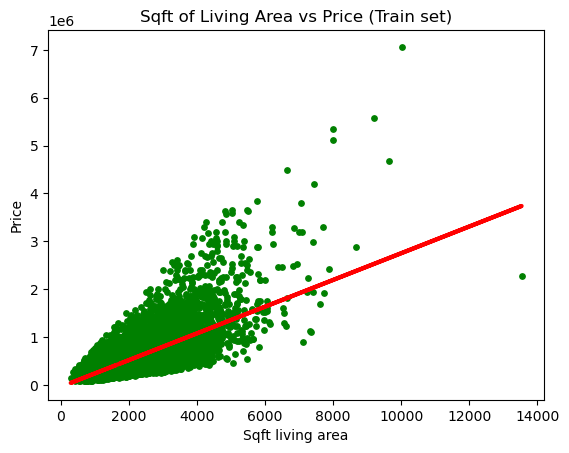

In [33]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Sqft of Living Area vs Price (Train set)')
plot_test.xlabel('Sqft living area')
plot_test.ylabel('Price')
plot_test.show()